In [1]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [2]:
place = 'Kyiv, Ukraine'
local_crs = 5514

In [3]:
geopandas.tools.geocode(place).explore()

In [4]:
buildings = osmnx.features.features_from_place(place, tags={'building': True})
buildings.head()

name                  name:uk operator  \
element_type osmid                                                            
node         385664630            Pacific                  Pacific      NaN   
             660430209   Іллінська церква  Іллінська церква УПЦ МП      NaN   
             796648457                КПП                      КПП      NaN   
             835130259                NaN                      NaN      NaN   
             1119810191               NaN                      NaN      NaN   

                        railway  ref wheelchair                   geometry  \
element_type osmid                                                           
node         385664630      NaN  NaN        NaN  POINT (30.53564 50.44551)   
             660430209      NaN  NaN        NaN  POINT (30.52420 50.46661)   
             796648457      NaN  NaN        NaN  POINT (30.54978 50.39972)   
             835130259      NaN  NaN        NaN  POINT (30.51546 50.42443)   
             1119810191     NaN  NaN        NaN  POINT (30.51539 50.42454)   

                        entrance man_made           amenity  ...  \
element_type osmid                                           ...   
node         385664630       NaN      NaN        restaurant  ...   
             660430209       NaN      NaN  place_of_worship  ...   
             796648457       NaN      NaN               NaN  ...   
             835130259       NaN      NaN               NaN  ...   
             1119810191      NaN      NaN               NaN  ...   

                        toilets:handwashing addr:block playground size levels  \
element_type osmid                                                              
node         385664630                  NaN        NaN        NaN  NaN    NaN   
             660430209                  NaN        NaN        NaN  NaN    NaN   
             796648457                  NaN        NaN        NaN  NaN    NaN   
             835130259                  NaN        NaN        NaN  NaN    NaN   
             1119810191                 NaN        NaN        NaN  NaN    NaN   

                        ways abandoned:shop website_1 ref:edbo  \
element_type osmid                                               
node         385664630   NaN            NaN       NaN      NaN   
             660430209   NaN            NaN       NaN      NaN   
             796648457   NaN            NaN       NaN      NaN   
             835130259   NaN            NaN       NaN      NaN   
             1119810191  NaN            NaN       NaN      NaN   

                        payment:discover_card  
element_type osmid                             
node         385664630                    NaN  
             660430209                    NaN  
             796648457                    NaN  
             835130259                    NaN  
             1119810191                   NaN  

[5 rows x 578 columns]

In [5]:
buildings.geom_type.value_counts()

Polygon         89223
Point             499
MultiPolygon        7
LineString          3
Name: count, dtype: int64

In [6]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)
buildings.head()

,name,name:uk,operator,railway,ref,wheelchair,geometry,entrance,man_made,amenity,...,toilets:handwashing,addr:block,playground,size,levels,ways,abandoned:shop,website_1,ref:edbo,payment:discover_card
0,Льодовий стадіон,Льодовий стадіон,NaN,NaN,NaN,NaN,"POLYGON ((30.46587 50.37400, 30.46697 50.37331...",NaN,NaN,ice_rink,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.62538 50.43625, 30.62555 50.43629...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.62585 50.43546, 30.62601 50.43550...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ЖРЕО-417,ЖРЕО-417,NaN,NaN,NaN,NaN,"POLYGON ((30.62573 50.43636, 30.62629 50.43650...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.62650 50.43652, 30.62667 50.43656...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
buildings.is_valid.all()

True

In [12]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [13]:
buildings["uID"] = range(len(buildings))
buildings.head()

,geometry,uID
0,"POLYGON ((400715.451 -1047066.528, 400798.992 ...",0
1,"POLYGON ((411512.314 -1039314.466, 411523.660 ...",1
2,"POLYGON ((411551.985 -1039399.946, 411563.241 ...",2
3,"POLYGON ((411535.943 -1039300.928, 411574.307 ...",3
4,"POLYGON ((411589.050 -1039278.554, 411600.700 ...",4


In [14]:
%time check = momepy.CheckTessellationInput(buildings)

Collapsed features  : 3
Split features      : 41
Overlapping features: 198
CPU times: user 5.71 s, sys: 73.4 ms, total: 5.79 s
Wall time: 5.79 s


In [15]:
%time buildings = buildings.drop(check.collapse.index.union(check.overlap.index).union(check.split.index))

CPU times: user 13.8 ms, sys: 1.49 ms, total: 15.3 ms
Wall time: 13.7 ms


<Axes: >

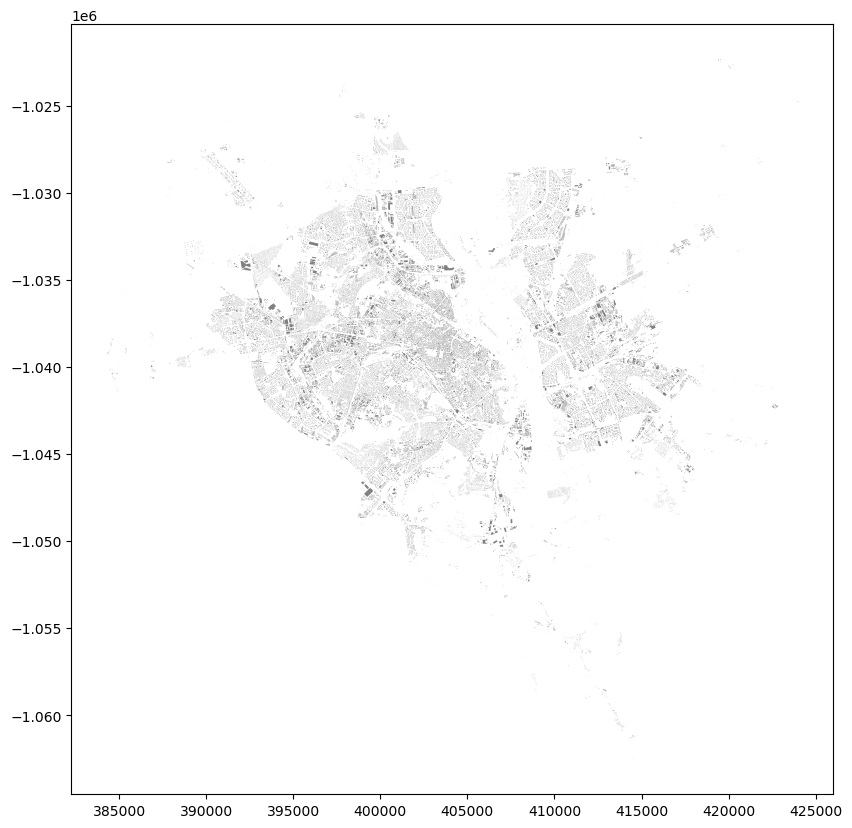

In [16]:
buildings.plot(figsize=(10,10), color='grey')

In [17]:
buildings.to_file("../data/buildings.gpkg", driver='GPKG', layer="buildings")